In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pylab import get_cmap
from matplotlib.colors import ListedColormap

In [ ]:
def find_sub_directories(rootdir):
    
    sub_directories = []
    
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        
        if os.path.isdir(d):
            sub_directories.append(d)
            
        else:
            continue
            
    return(sub_directories)

In [3]:
# simple generator with black rgba background
n = 10
cb_cmap = get_cmap('hsv', n) # lut == n_percentile pairs ???
colors = cb_cmap(np.linspace(0,1,n+1))

black = np.reshape(np.asarray([0,0,0,1]), (1,4))
white = np.reshape(np.asarray([255, 255, 255,1]), (1,4))

colors_black = np.concatenate((black, colors), axis = 0)

#np.savetxt(os.path.join(paper_path, 'hsv colormap with black background.txt'), colors_black, delimiter=',')

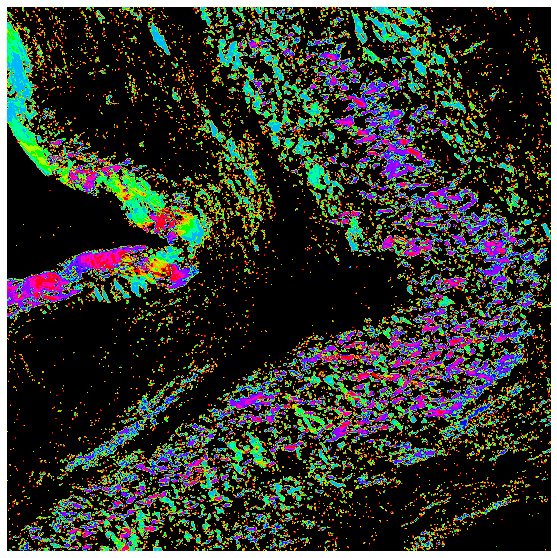

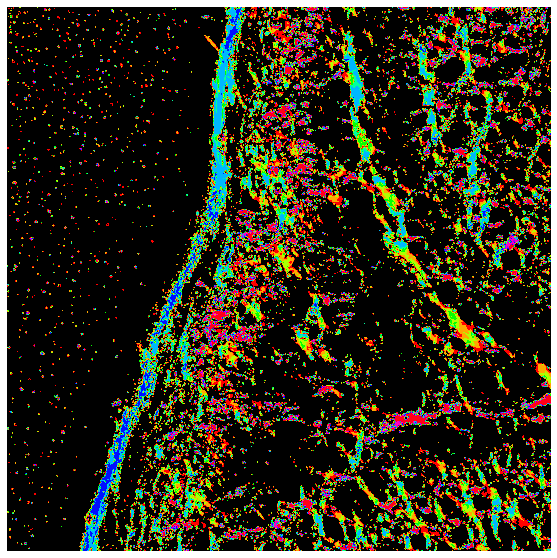

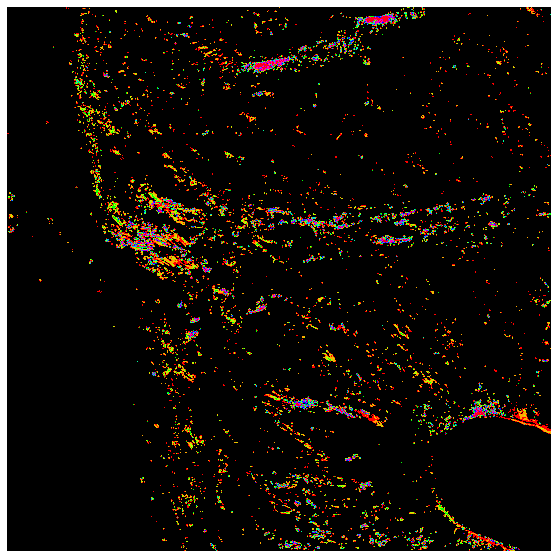

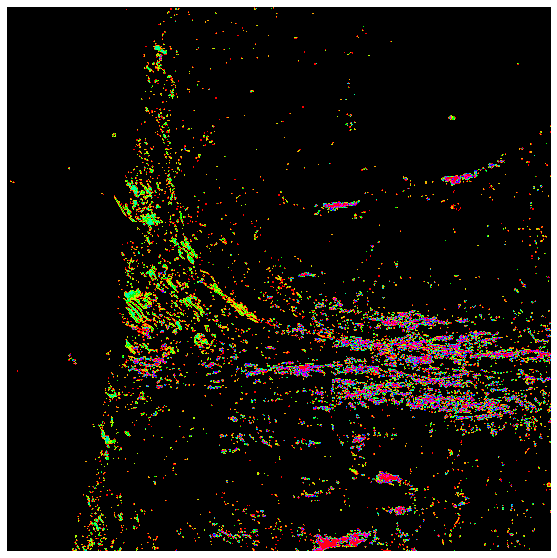

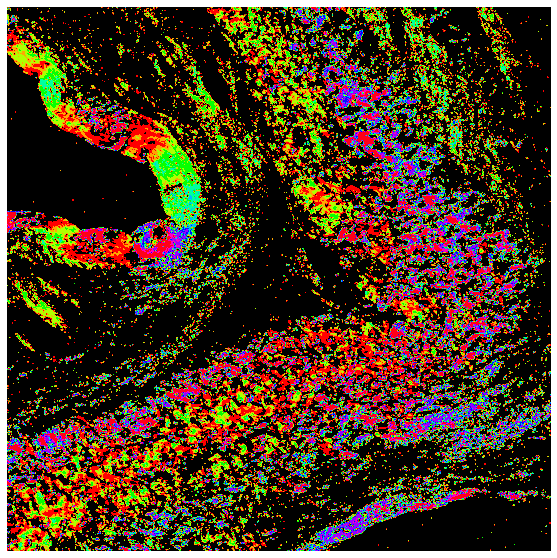

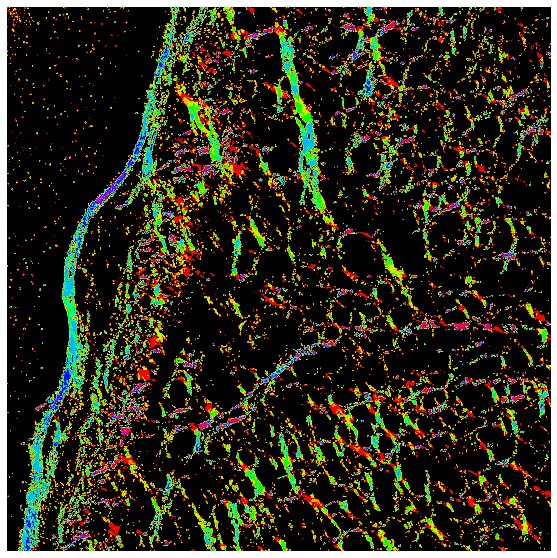

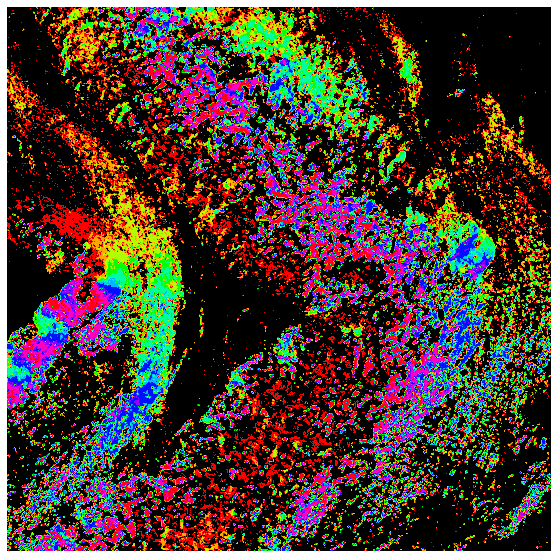

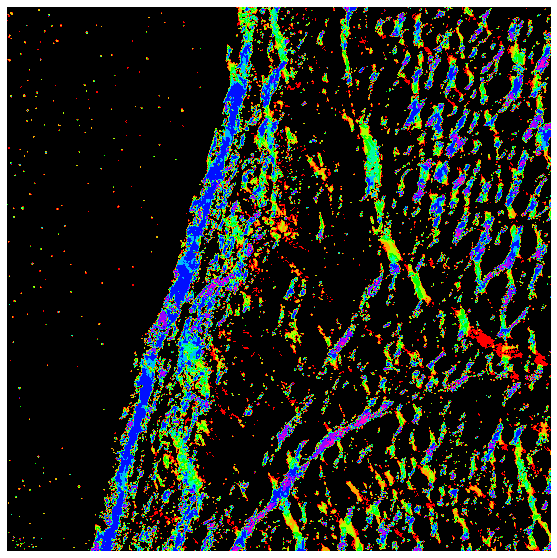

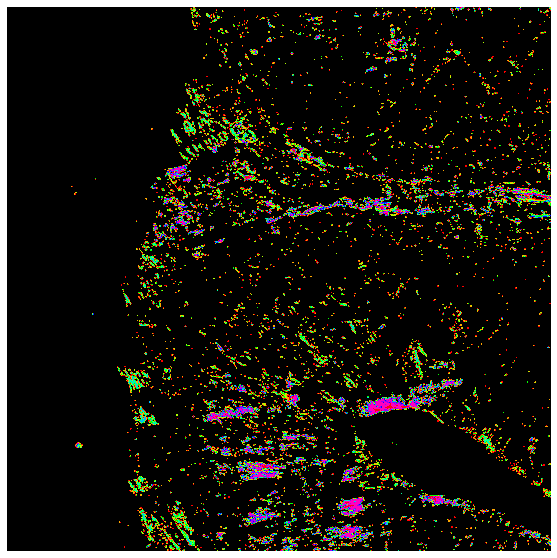

In [4]:
## load images for PLM color blocking
fpath = r'/Users/ryan/Desktop/Diana | Suture/PLM/coronal_sections/Orientation/EXTRA RUNS/float pr10 fs3 round 2'
fname_imgs = r'FILT_IMGS test.npy'
fname_img_names = r'NAMES test.npy'

imgs = tuple(np.load(os.path.join(fpath, fname_imgs), allow_pickle=True))
img_names = tuple(np.load(os.path.join(fpath, fname_img_names), allow_pickle=True))

# color_blocked = []
for i in range(len(imgs)):
    plt.figure(figsize=(10,10))
    plt.imshow(imgs[i].max(axis = 0), cmap=ListedColormap(colors_black))
    plt.axis('off')
    plt.show()

['/Users/ryan/Desktop/Diana | Suture/PLM/coronal_sections/Orientation/EXTRA RUNS/float pr10 fs3 round 2', '/Users/ryan/Desktop/Diana | Suture/PLM/coronal_sections/Orientation/EXTRA RUNS/float PERCENTILE_RANGE10 FILT_SZ3']


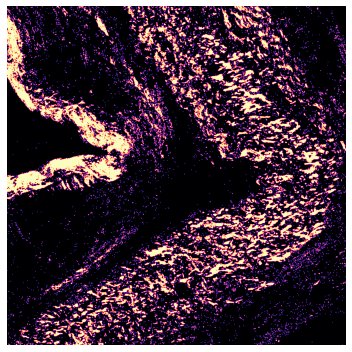

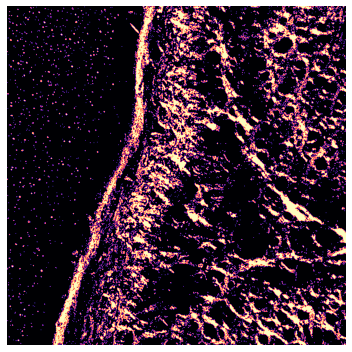

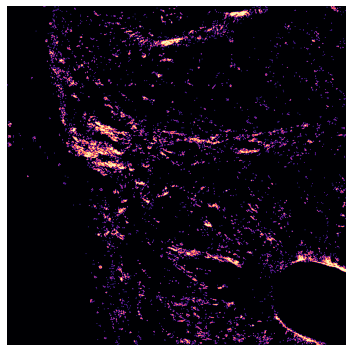

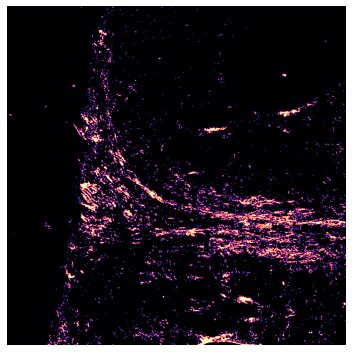

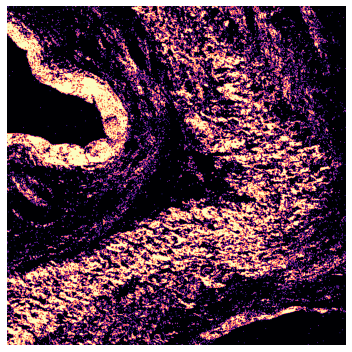

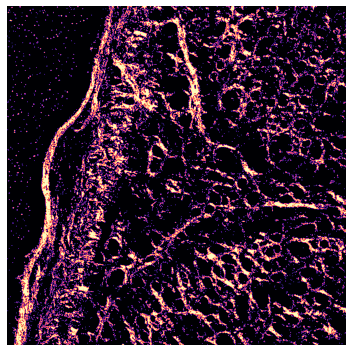

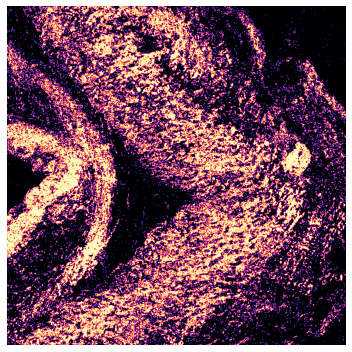

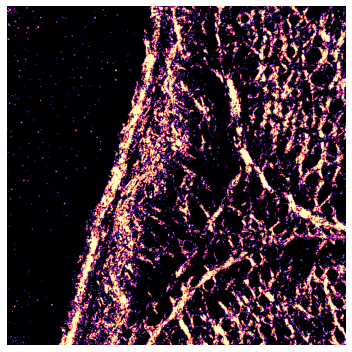

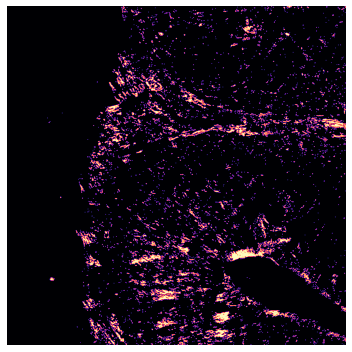

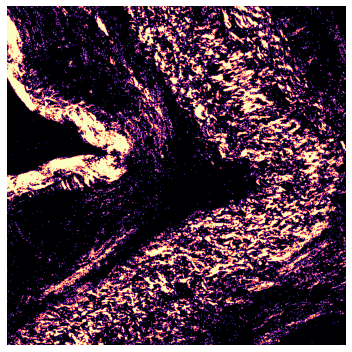

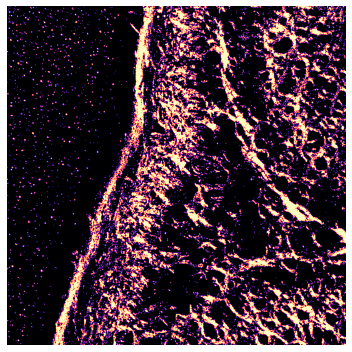

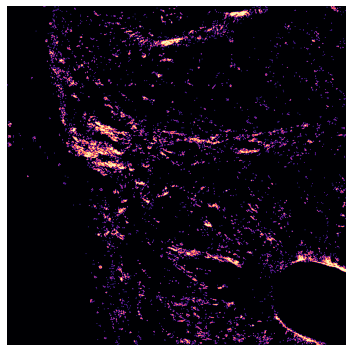

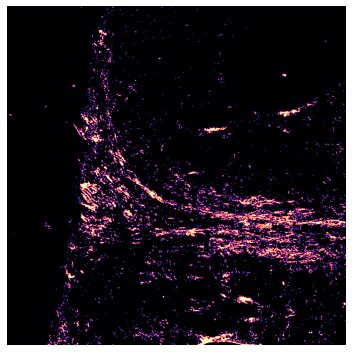

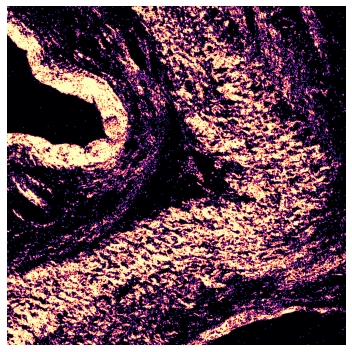

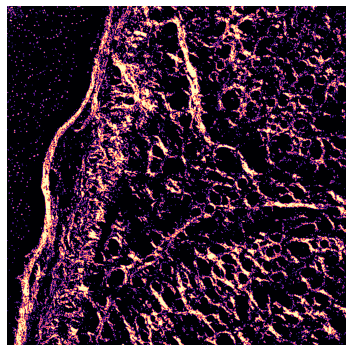

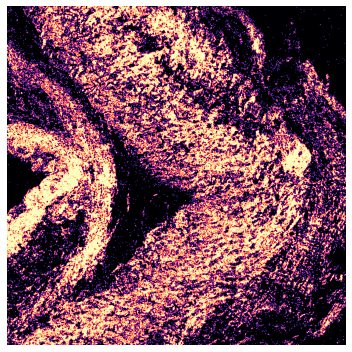

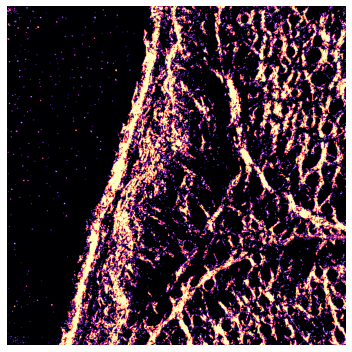

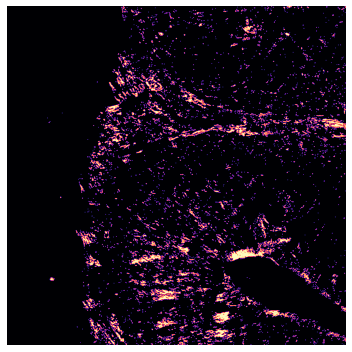

In [6]:
### Convert PLM Files for Diana's Paper
TOP_PATH = r'/Users/ryan/Desktop/Diana | Suture/PLM/coronal_sections/Orientation/EXTRA RUNS'
SUB_DIRS = find_sub_directories(TOP_PATH)
print(SUB_DIRS)

## saving angle distributions in cleaned images
for i in SUB_DIRS:
    idx_imgs = tuple(np.load(os.path.join(i, 'INDEXED test.npy'), allow_pickle=True))
    names = tuple(np.load(os.path.join(i, 'NAMES test.npy'), allow_pickle=True))
    for j in range(len(idx_imgs)):
        x = idx_imgs[j].flatten()
        x = x[x>0]
        #np.savetxt(os.path.join(i, names[j] + ' angles in denoised.csv'), x, delimiter=',')
        print(x.shape)
        plt.figure(figsize=(10,5))
        plt.hist(x, bins = 'fd', color= DAA_COLORS[DAA_LABELS.index(names[j][:5])], label = names[j])
        plt.xlim(0,180)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.ylabel('Pixel Count', fontsize = 28)
        plt.xlabel('Angle', fontsize = 28)
        plt.legend(fontsize = 20)
        plt.tight_layout()
        #plt.savefig(os.path.join(i, names[j] + ' indexed angle distribution.png'), dpi = 300)
        plt.show()